## A. (4-to-1 RNN) to show that the quantity of rain on a certain day also depends on the values of the previous day

Epoch 1/100
2/2 [==============================] - 3s 27ms/step - loss: 2.0540
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 1.9797
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 1.9028
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 1.8314
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 1.7606
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 1.6942
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 1.6270
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 1.5650
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 1.5042
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 1.4432
Epoch 11/100
2/2 [==============================] - 0s 13ms/step - loss: 1.3874
Epoch 12/100
2/2 [==============================] - 0s 14ms/step - loss: 1.3325
Epoch 13/100
2/2 [==============================]

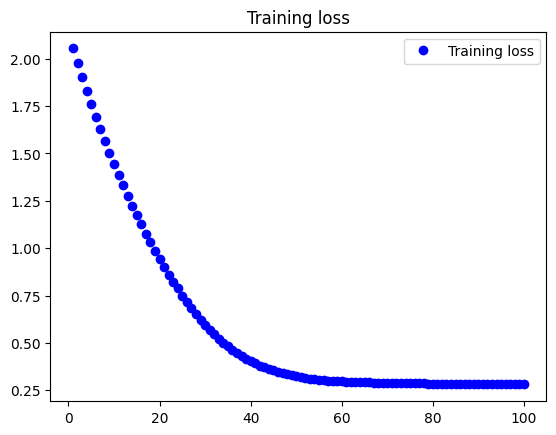

1/1 [==============================] - 0s 372ms/step
Previous days' rain data: [2.5 2.2 2.8 3.2]
Expected rain amount for next day: 2.6843915
1/1 [==============================] - 0s 42ms/step
Prediction: 2.6843915


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define sequence of 50 days of rain data
rain_data = np.array([2.3, 1.5, 3.1, 2.0, 2.5, 1.7, 2.9, 3.5, 3.0, 2.1,
                      2.5, 2.2, 2.8, 3.2, 1.8, 2.7, 1.9, 3.1, 3.3, 2.0,
                      2.5, 2.2, 2.4, 3.0, 2.1, 2.5, 3.2, 3.1, 1.9, 2.7,
                      2.2, 2.8, 3.1, 2.0, 2.5, 1.7, 2.9, 3.5, 3.0, 2.1,
                      2.5, 2.2, 2.8, 3.2, 1.8, 2.7, 1.9, 3.1, 3.3, 2.0])

# Create input and output sequences for training
def create_sequences(values, time_steps):
    x = []
    y = []
    for i in range(len(values)-time_steps):
        x.append(values[i:i+time_steps])
        y.append(values[i+time_steps])
    return np.array(x), np.array(y)

time_steps = 4
x_train, y_train = create_sequences(rain_data, time_steps)

# Define RNN model
model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(8, input_shape=(time_steps, 1)),
        tf.keras.layers.Dense(1)
        ])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Train model
history = model.fit(x_train.reshape(-1, time_steps, 1), y_train, epochs=100)

# Plot loss over time
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.title("Training loss")
plt.legend()
plt.show()

# Test model on new sequence
test_sequence = np.array([2.5, 2.2, 2.8, 3.2])
x_test = np.array([test_sequence])
y_test = model.predict(x_test.reshape(-1, time_steps, 1))

# Print input, output, and prediction
print("Previous days' rain data:", test_sequence)
print("Expected rain amount for next day:", y_test[0][0])
prediction = model.predict(np.array([test_sequence]).reshape(1, time_steps, 1))
print("Prediction:", prediction[0][0])